In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
%reload_ext snakeviz

In [3]:
from collections import namedtuple
from os.path import join, abspath, dirname, pardir

# LFP sampling frequency
sampling_frequency = 1500

# Data directories and definitions
NOTEBOOK_DIR = !pwd
ROOT_DIR = abspath(dirname(NOTEBOOK_DIR[0]))
RAW_DATA_DIR = join(ROOT_DIR, 'Raw-Data')

Animal = namedtuple('Animal', {'directory', 'short_name'})
animals = {
    'bon': Animal(directory=join(RAW_DATA_DIR, 'Bond'),
                  short_name='bon'),
}

epoch_key = ('bon', 3, 2)

Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, using distance from well to segment trials
Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, inferring correct inbound/outbound from task rules


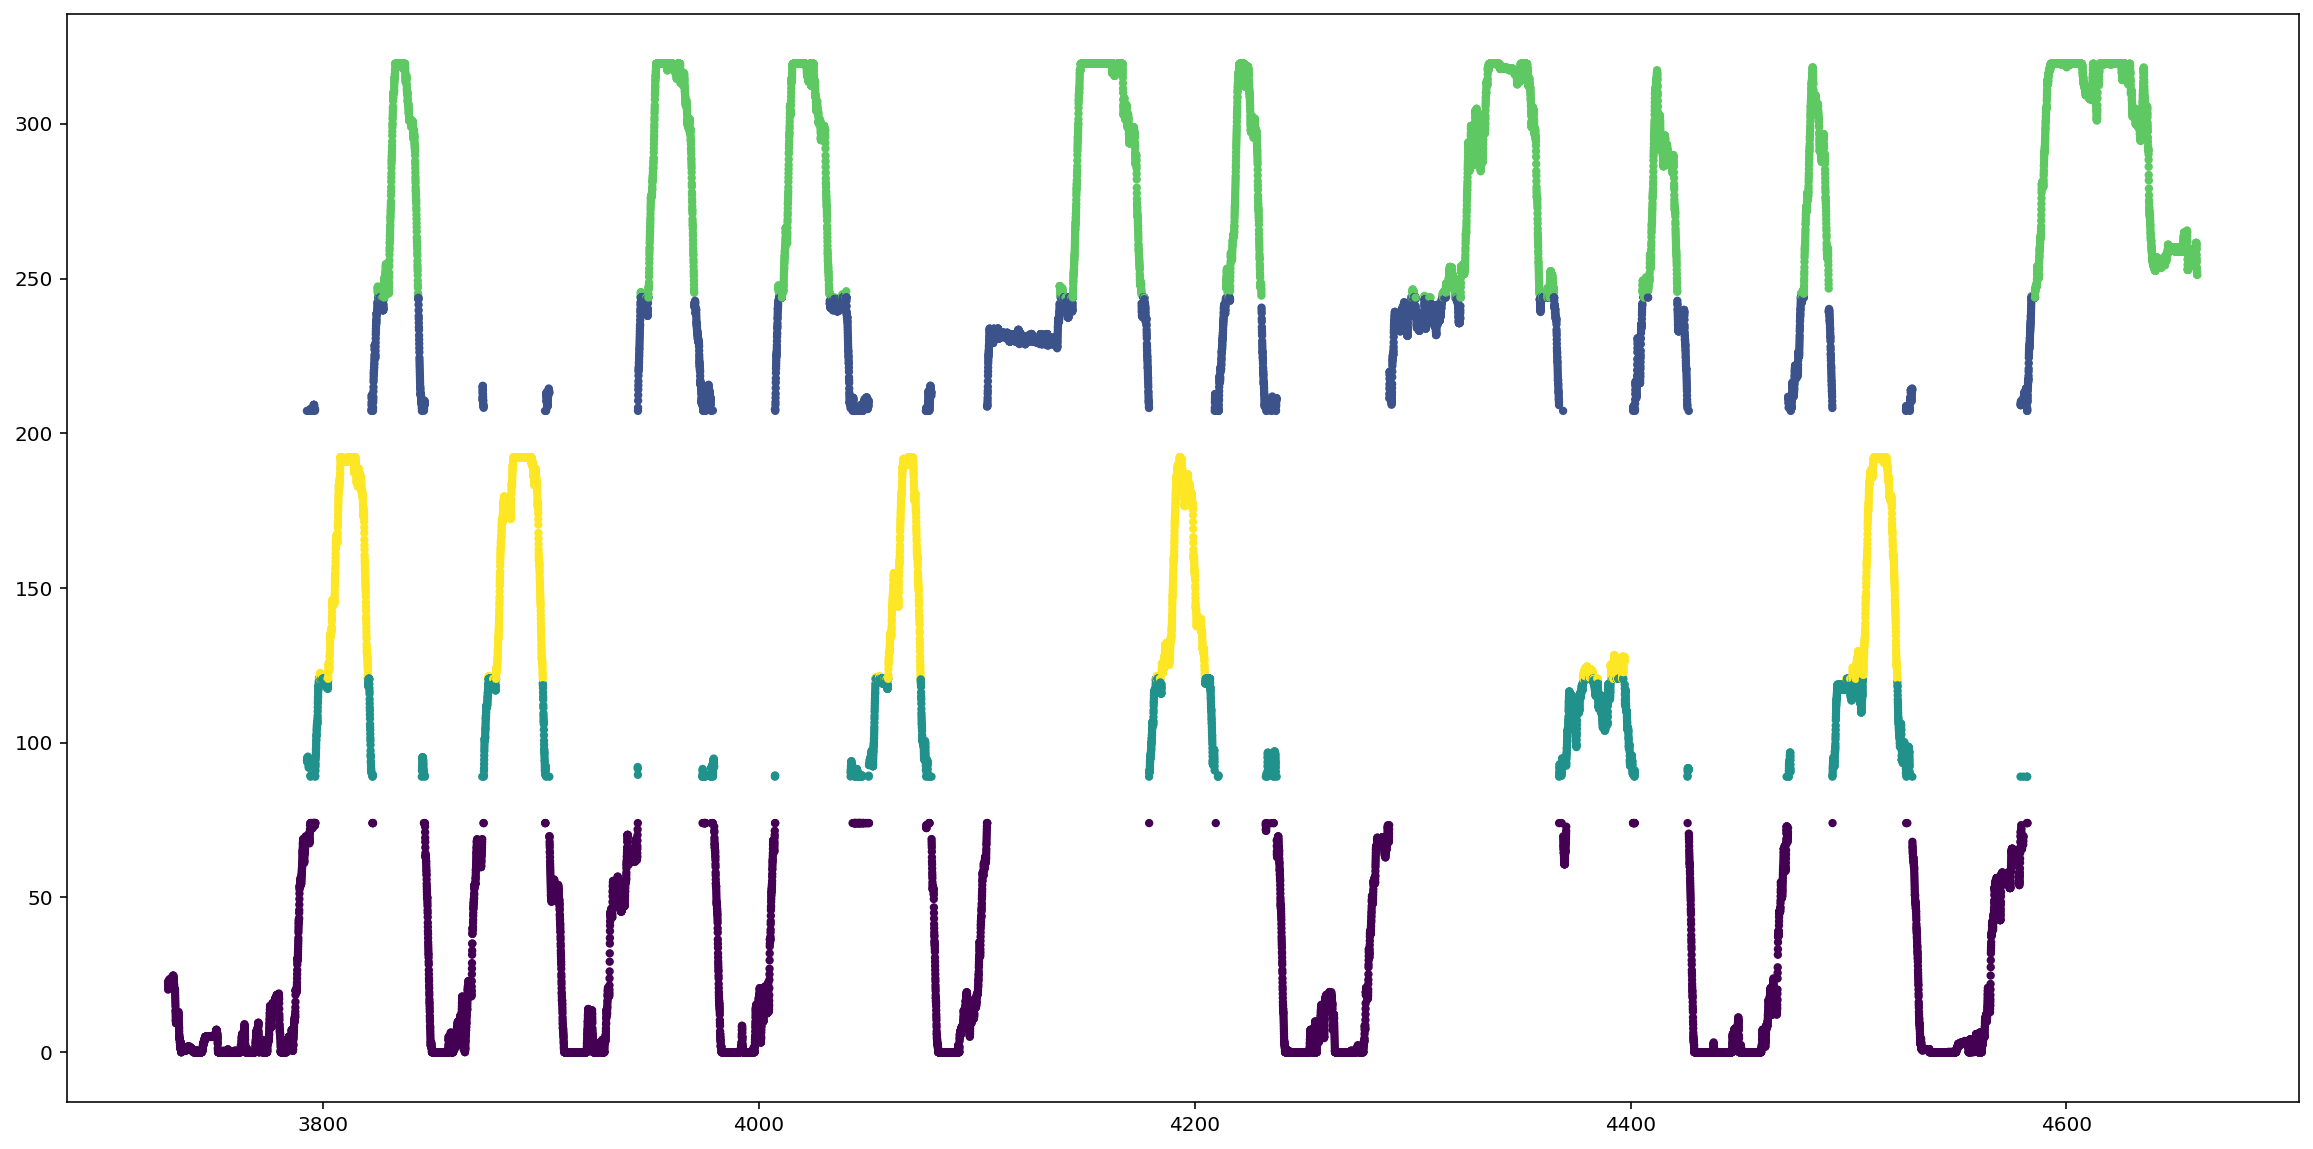

In [7]:
from loren_frank_data_processing.position import get_position_dataframe
import matplotlib.pyplot as plt
import numpy as np

position_df = get_position_dataframe(epoch_key, animals, diagonal_bias=0.0)

plt.figure(figsize=(20, 10))
plt.scatter(position_df.index / np.timedelta64(1, 's'), position_df.linear_position, s=10, c=position_df.track_segment_id.values)

In [5]:
%timeit get_position_dataframe(epoch_key, animals, diagonal_bias=0.0)

Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, using distance from well to segment trials
Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, inferring correct inbound/outbound from task rules
Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, using distance from well to segment trials
Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, inferring correct inbound/outbound from task rules
Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, using distance from well to segment trials
Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, inferring correct inbound

27.7 s ± 234 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%timeit get_position_dataframe(epoch_key, animals, diagonal_bias=0.0)

Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, using distance from well to segment trials
Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, inferring correct inbound/outbound from task rules
Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, using distance from well to segment trials
Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, inferring correct inbound/outbound from task rules
Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, using distance from well to segment trials
Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, inferring correct inbound

21 s ± 77.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
from dask.distributed import Client

client = Client(n_workers=32)
client

<Client: 'tcp://127.0.0.1:43481' processes=32 threads=64, memory=1.62 TB>

Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, using distance from well to segment trials
Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, inferring correct inbound/outbound from task rules


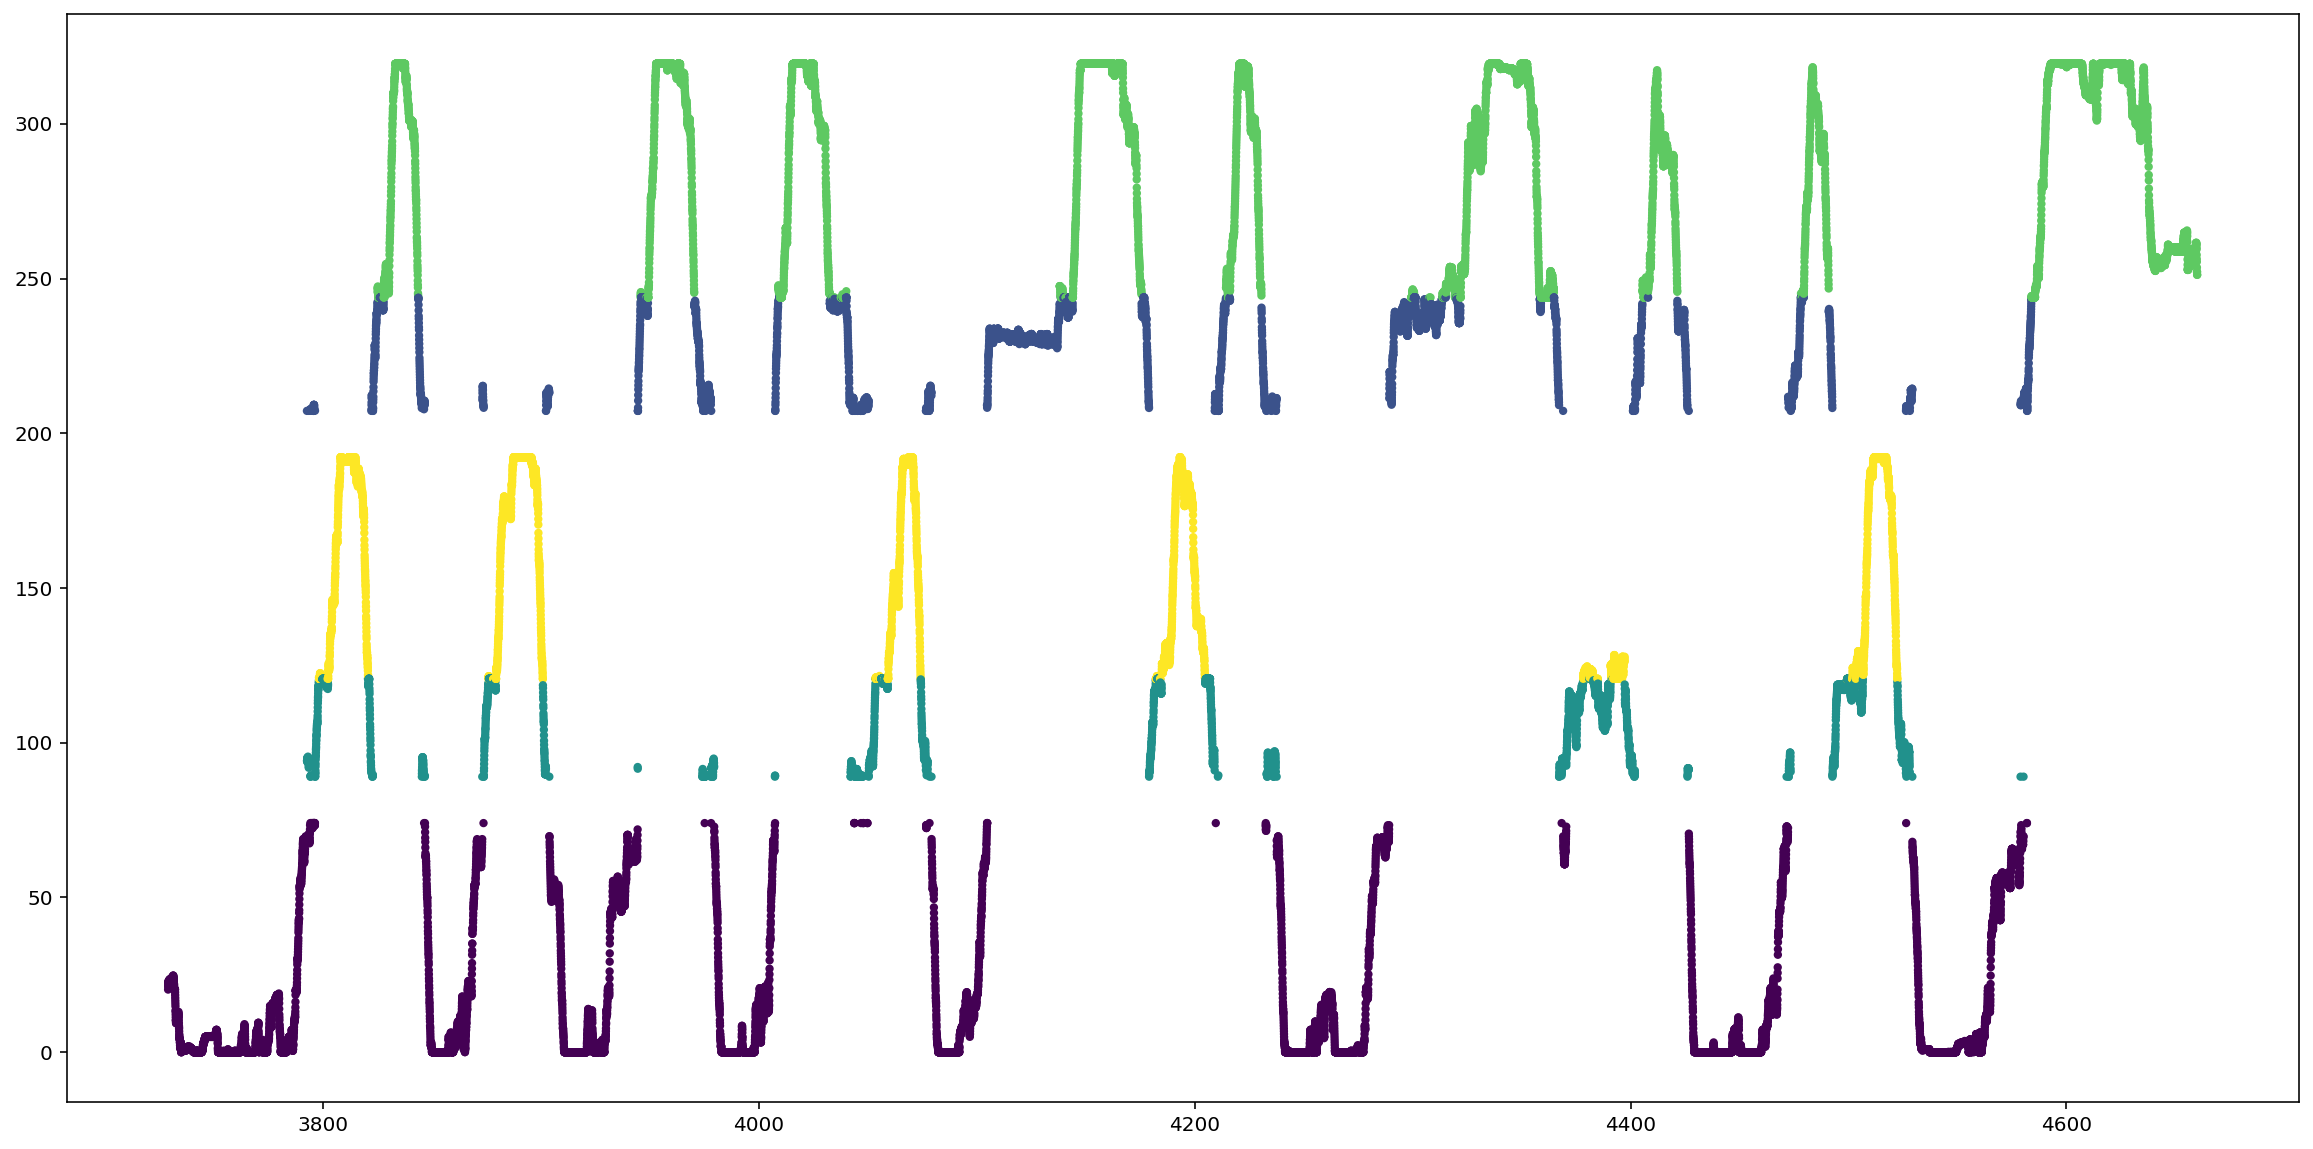

In [7]:
from loren_frank_data_processing.position import get_position_dataframe
import matplotlib.pyplot as plt
import numpy as np

position_df = get_position_dataframe(epoch_key, animals, diagonal_bias=0.1) # 0.5

plt.figure(figsize=(20, 10))
plt.scatter(position_df.index / np.timedelta64(1, 's'), position_df.linear_position, s=10, c=position_df.track_segment_id.values)

Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, using distance from well to segment trials
Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, inferring correct inbound/outbound from task rules
Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, using distance from well to segment trials
Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, inferring correct inbound/outbound from task rules
Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, using distance from well to segment trials
Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, inferring correct inbound

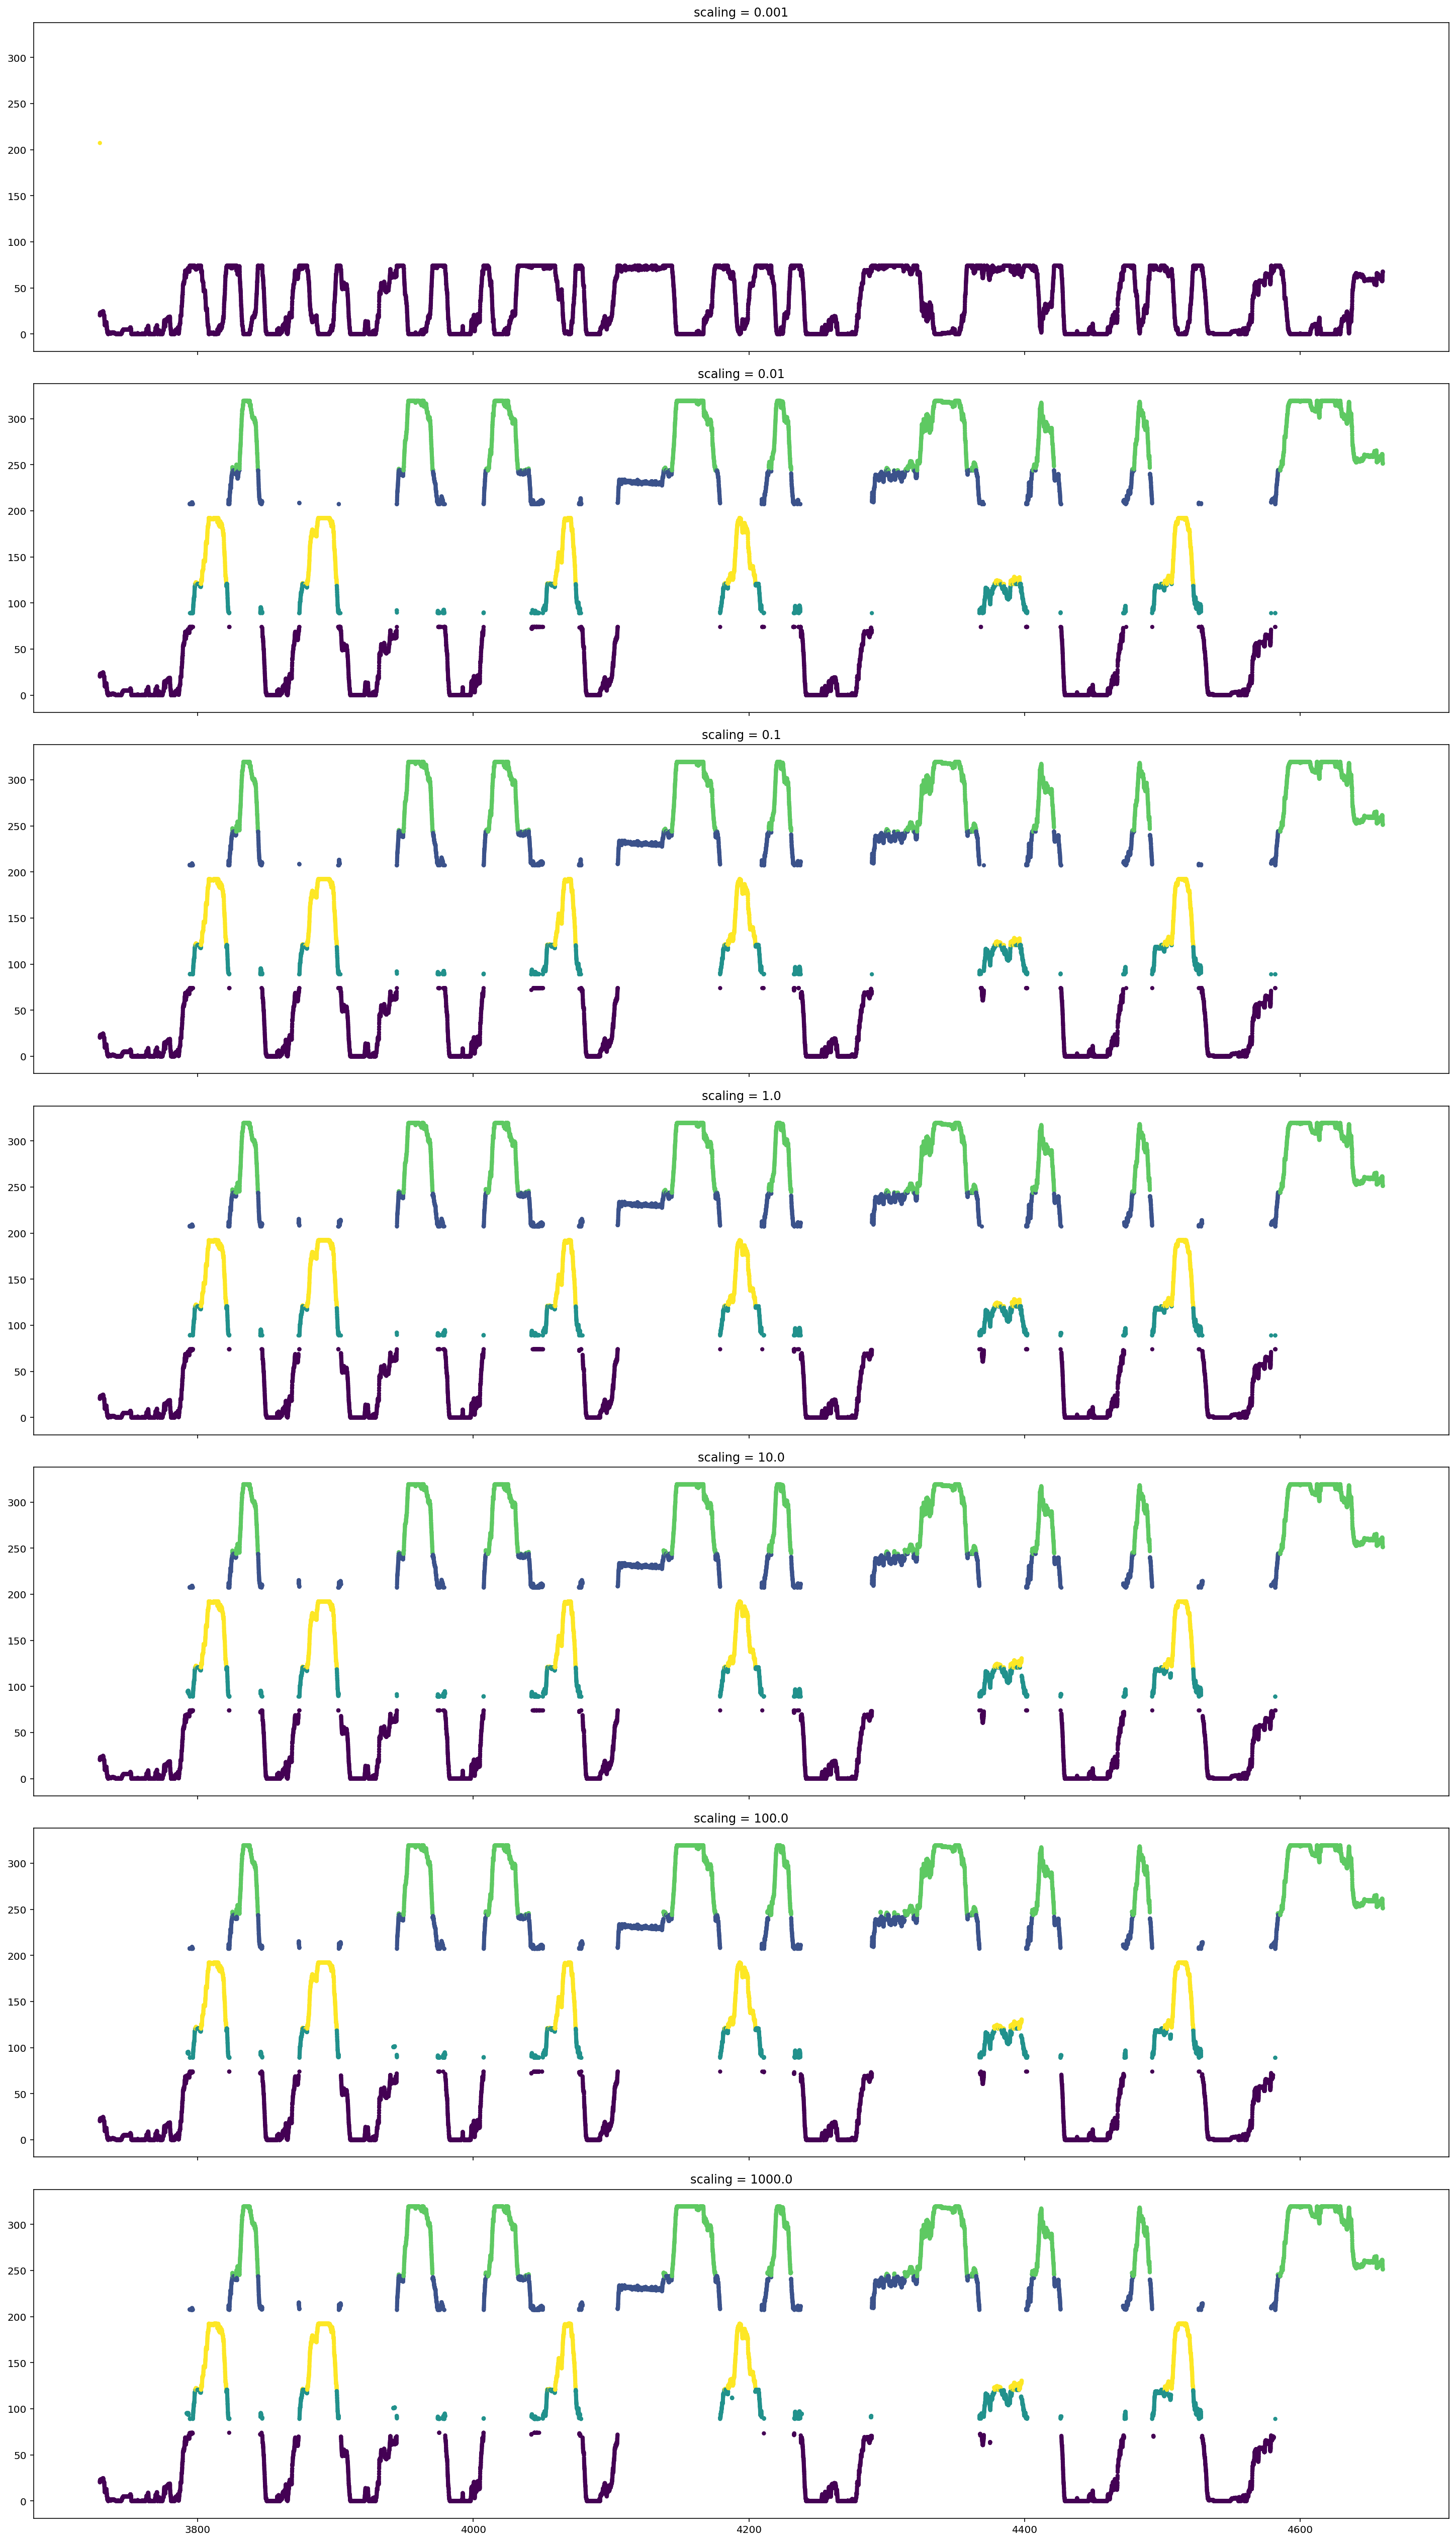

In [24]:
scalings = [1E-3, 1E-2, 1E-1, 1E0, 1E1, 1E2, 1E3]
n_plots = len(scalings)

fig, axes = plt.subplots(n_plots, 1, figsize=(20, n_plots*5), sharex=True, sharey=True, constrained_layout=True)

for ax, scaling in zip(axes.flat, scalings):
    position_df = get_position_dataframe(epoch_key, animals, route_euclidean_distance_scaling=scaling)
    ax.scatter(position_df.index / np.timedelta64(1, 's'), position_df.linear_position, s=10, c=position_df.track_segment_id.values)
    ax.set_title(f'scaling = {scaling}')

Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, using distance from well to segment trials
Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, inferring correct inbound/outbound from task rules
Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, using distance from well to segment trials
Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, inferring correct inbound/outbound from task rules
Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, using distance from well to segment trials
Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, inferring correct inbound

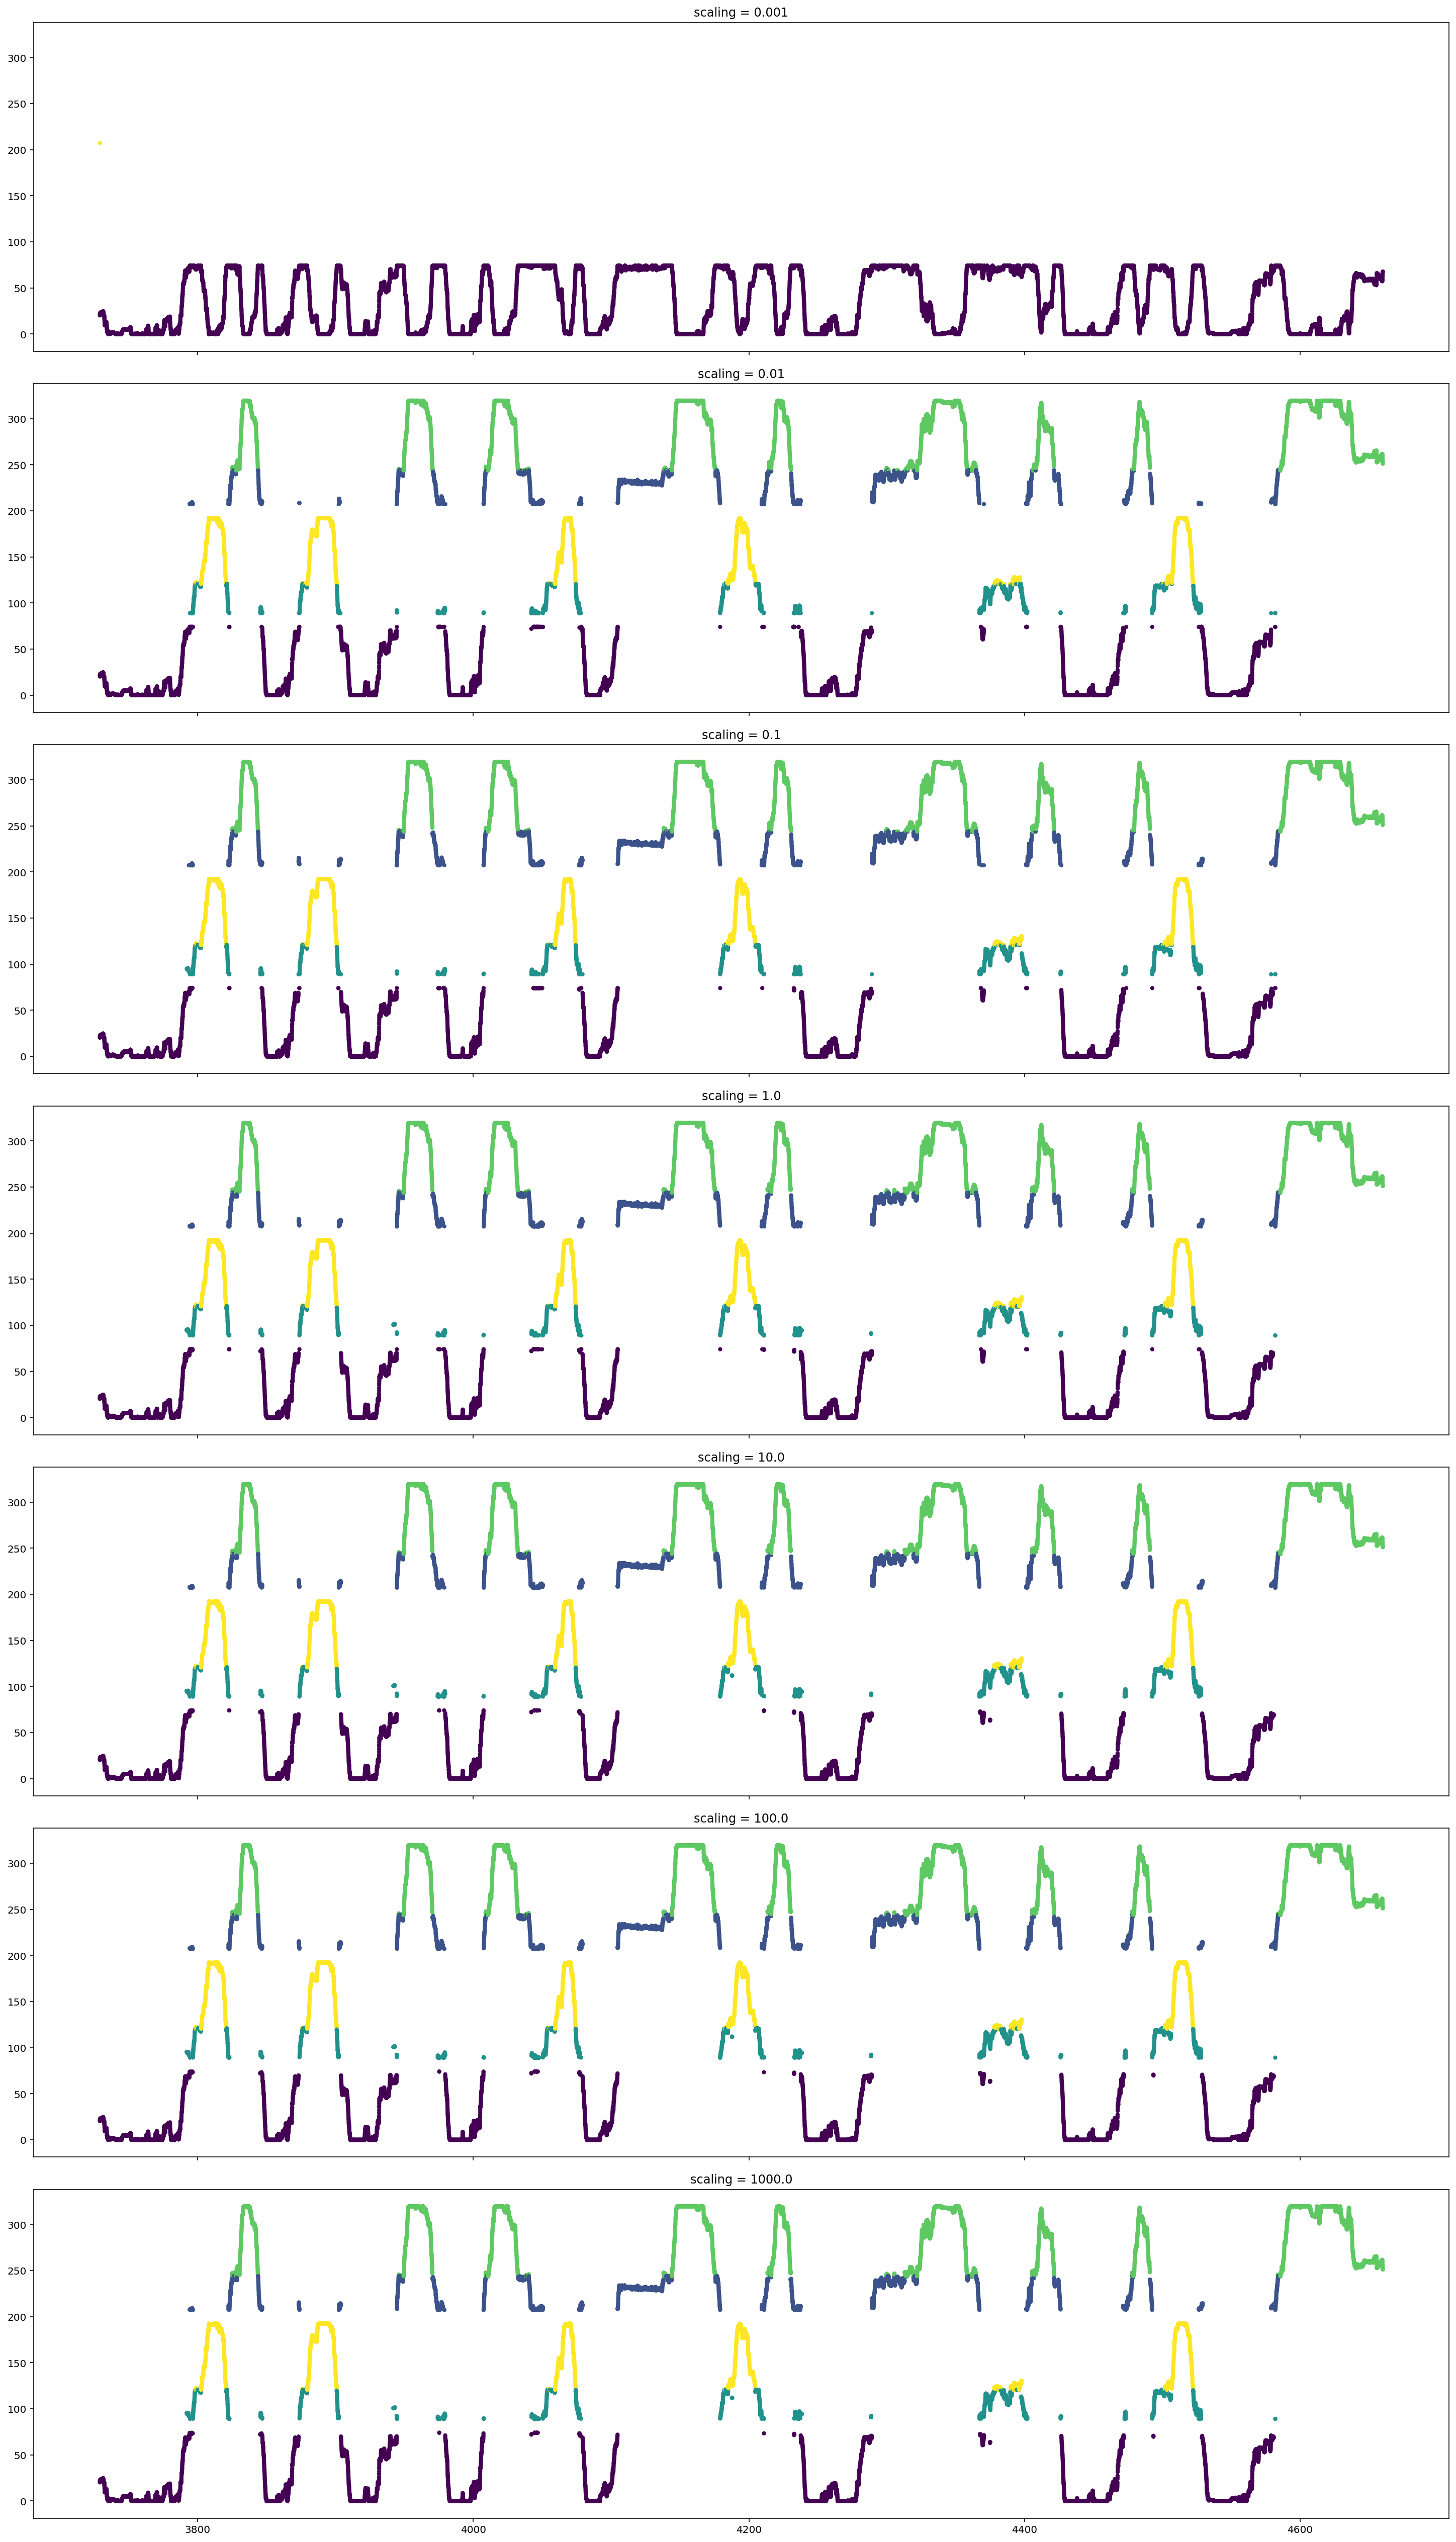

In [25]:
scalings = [1E-3, 1E-2, 1E-1, 1E0, 1E1, 1E2, 1E3]
n_plots = len(scalings)

fig, axes = plt.subplots(n_plots, 1, figsize=(20, n_plots*5), sharex=True, sharey=True, constrained_layout=True)

for ax, scaling in zip(axes.flat, scalings):
    position_df = get_position_dataframe(epoch_key, animals, route_euclidean_distance_scaling=scaling, sensor_std_dev=1)
    ax.scatter(position_df.index / np.timedelta64(1, 's'), position_df.linear_position, s=10, c=position_df.track_segment_id.values)
    ax.set_title(f'scaling = {scaling}')

Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, using distance from well to segment trials
Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, inferring correct inbound/outbound from task rules
Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, using distance from well to segment trials
Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, inferring correct inbound/outbound from task rules
Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, using distance from well to segment trials
Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, inferring correct inbound

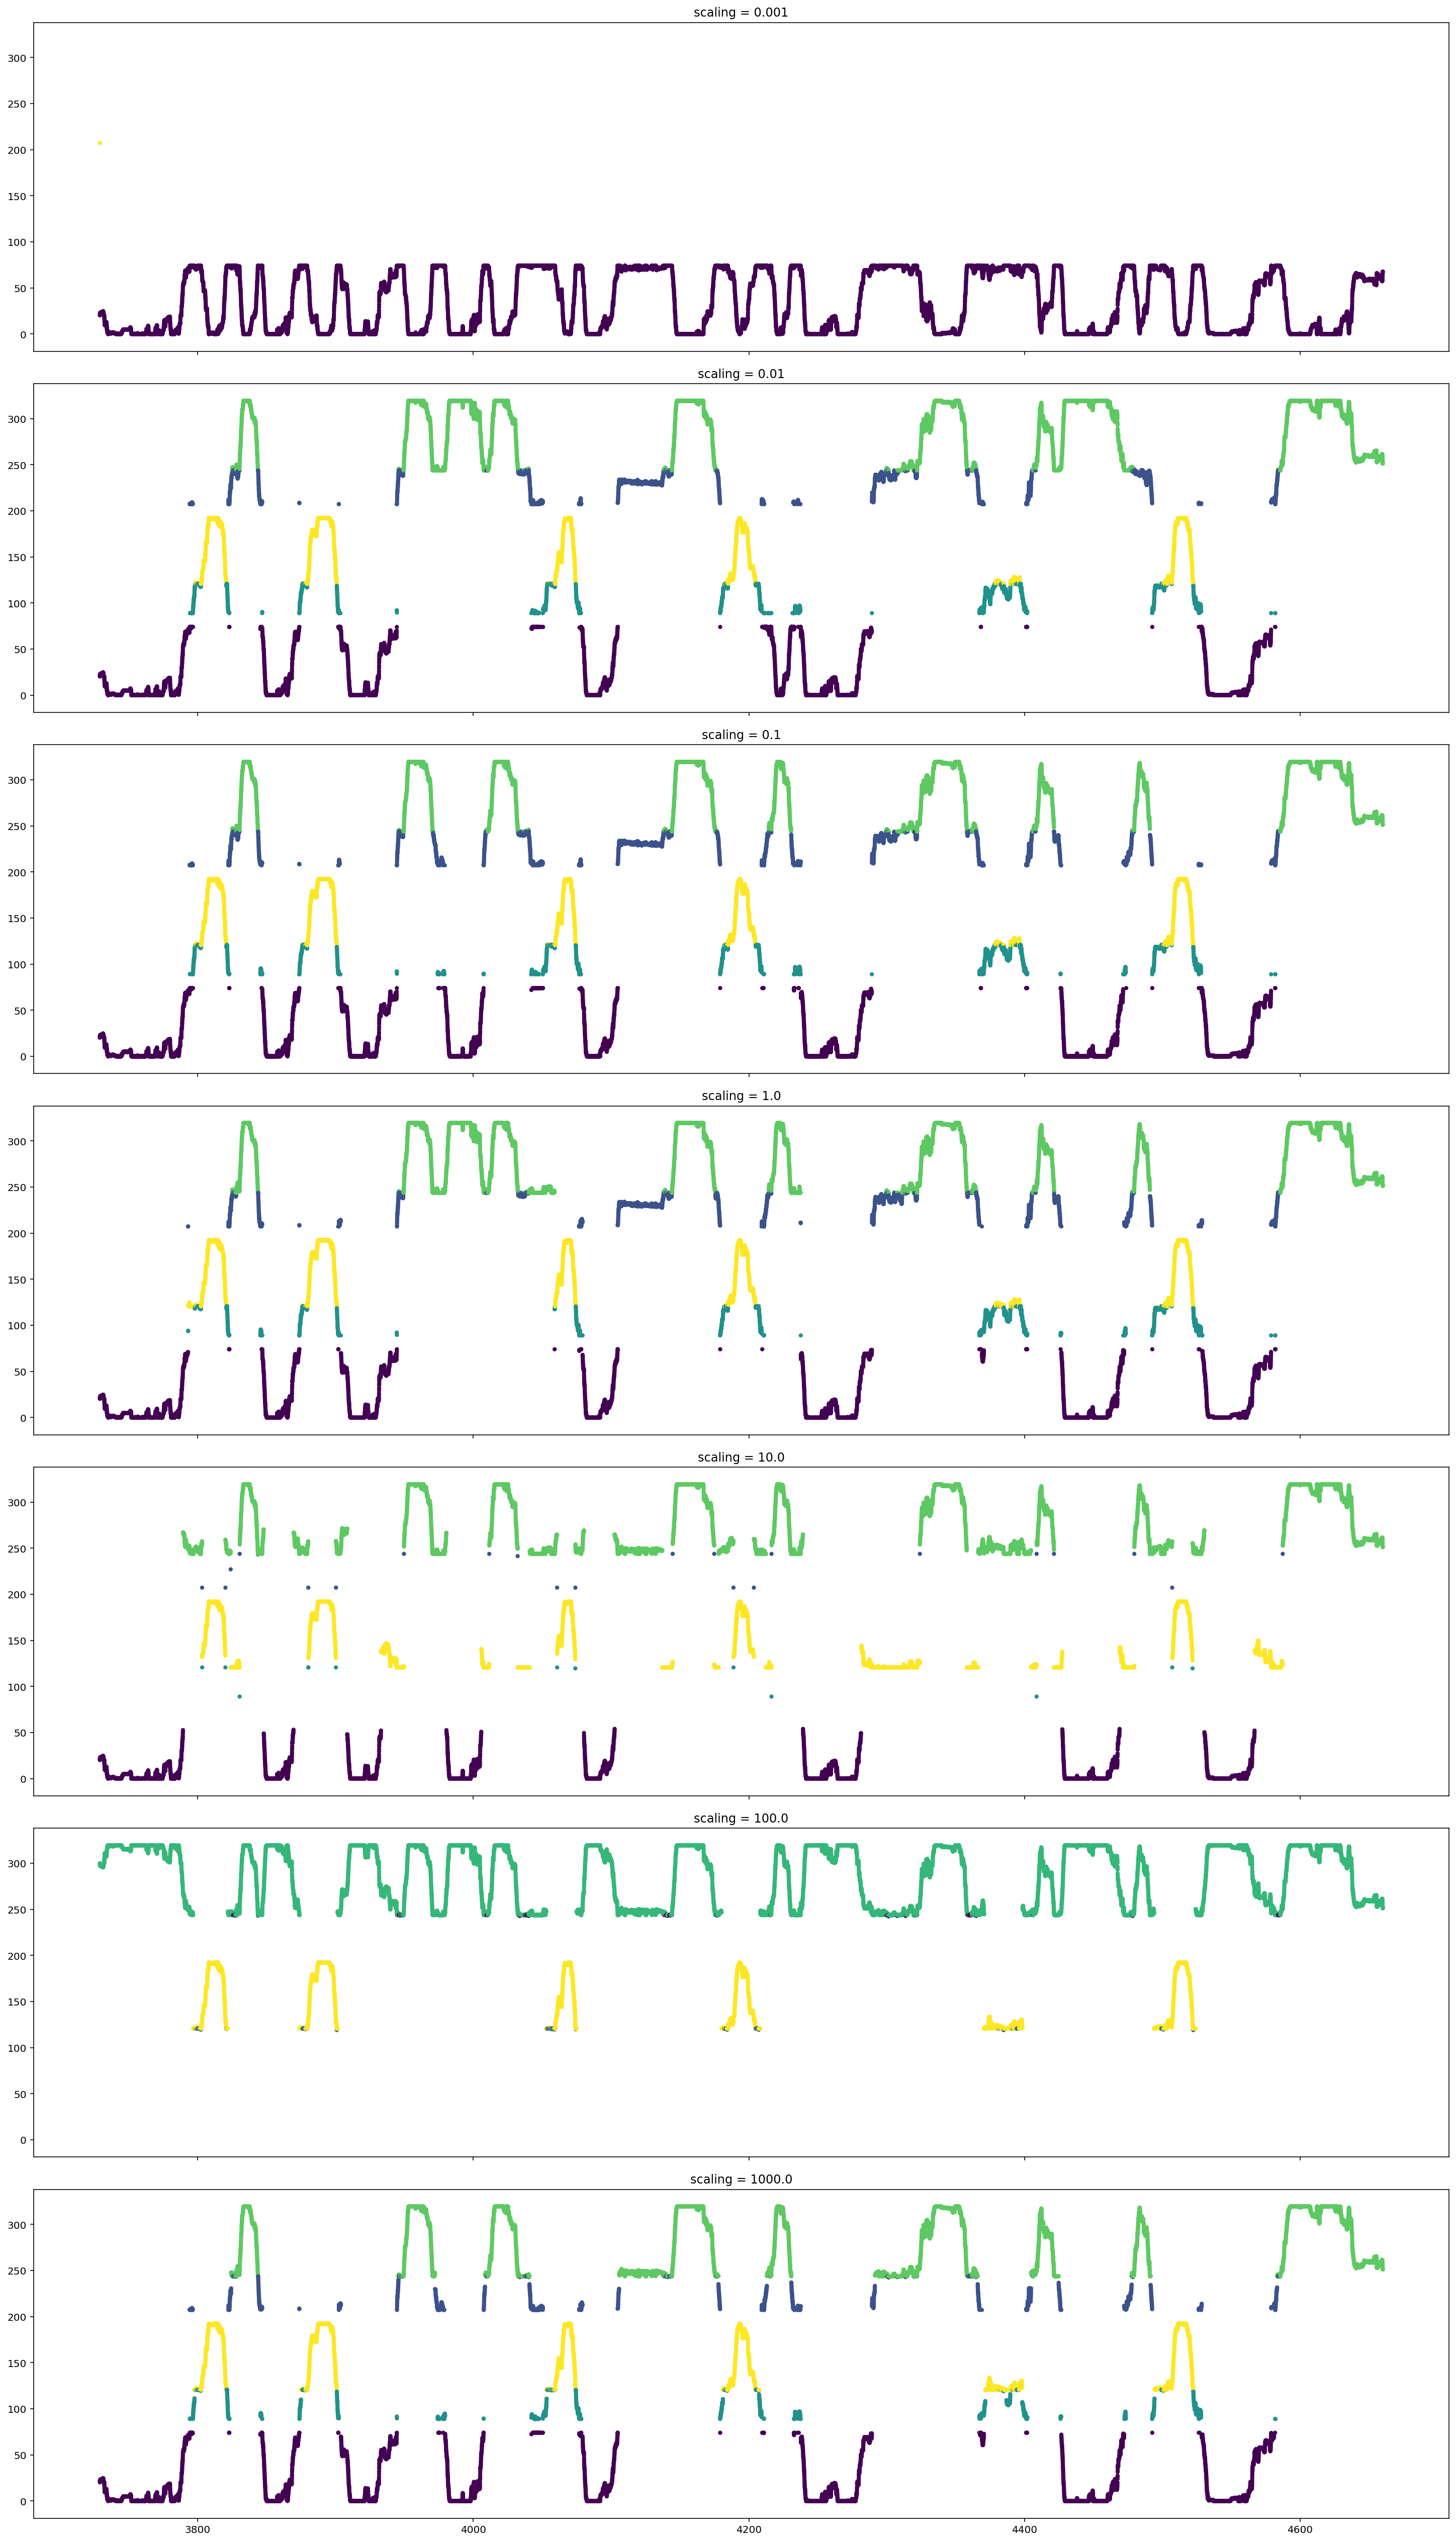

In [26]:
scalings = [1E-3, 1E-2, 1E-1, 1E0, 1E1, 1E2, 1E3]
n_plots = len(scalings)

fig, axes = plt.subplots(n_plots, 1, figsize=(20, n_plots*5), sharex=True, sharey=True, constrained_layout=True)

for ax, scaling in zip(axes.flat, scalings):
    position_df = get_position_dataframe(epoch_key, animals, route_euclidean_distance_scaling=scaling, sensor_std_dev=100)
    ax.scatter(position_df.index / np.timedelta64(1, 's'), position_df.linear_position, s=10, c=position_df.track_segment_id.values)
    ax.set_title(f'scaling = {scaling}')

## Fix HMM

In [10]:
from loren_frank_data_processing.position import make_track_graph

position_df = get_position_dataframe(epoch_key, animals)
track_graph, center_well_id = make_track_graph(epoch_key, animals)
position = position_df.loc[:, ['x_position', 'y_position']].values

Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, using distance from well to segment trials
Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, inferring correct inbound/outbound from task rules


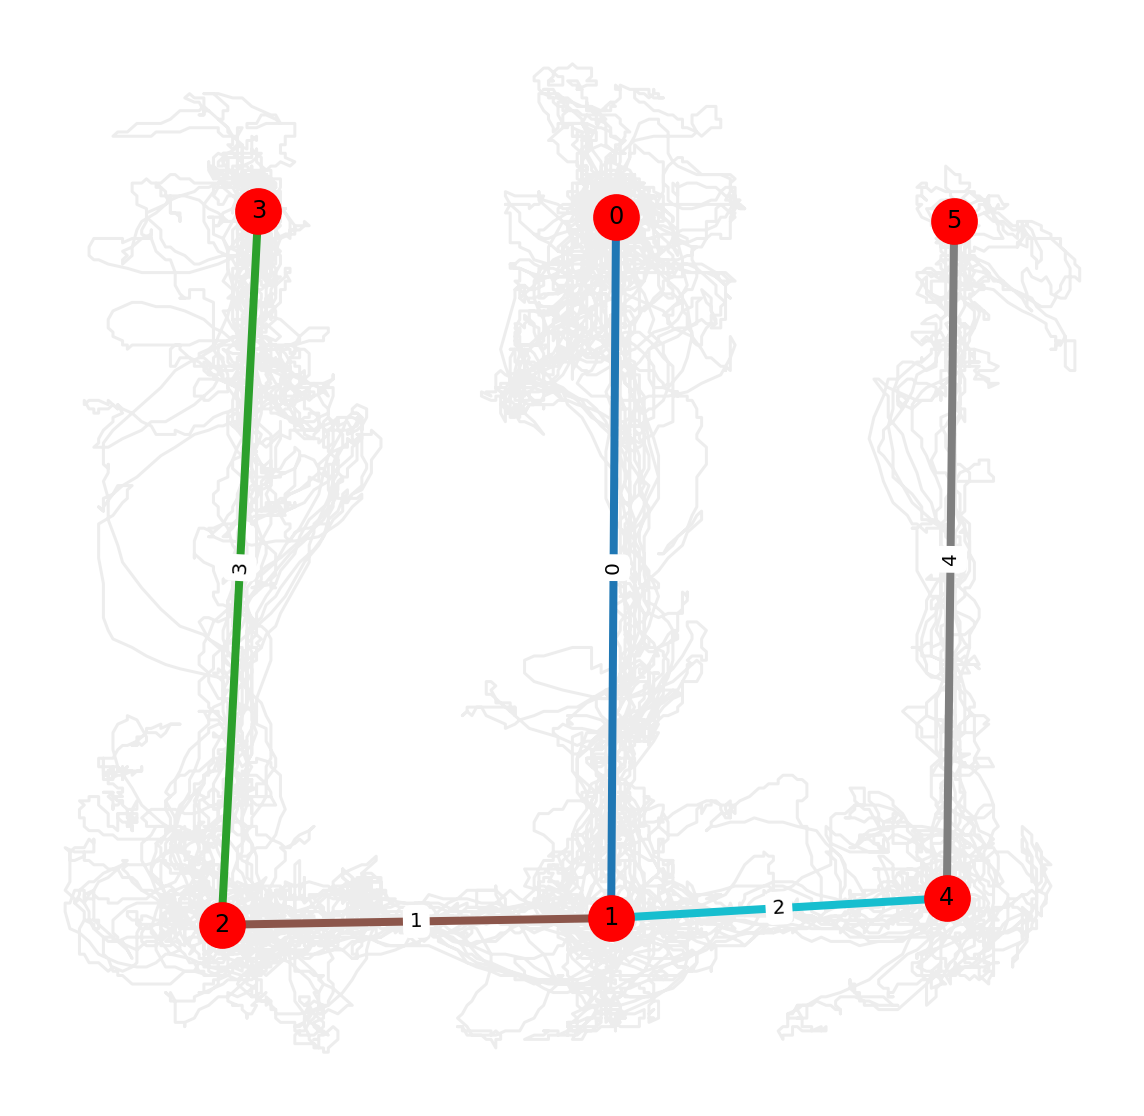

In [269]:
import networkx as nx

fig, ax = plt.subplots(figsize=(10, 10))

edge_order = [0, 2, 4, 1, 3]
edge_spacing = [15, 0, 15, 0]

ax.plot(position[:, 0], position[:, 1], zorder=-1, color='lightgrey', alpha=0.4)
node_position = nx.get_node_attributes(track_graph, "pos")
edge_labels = {edge: ind for ind, edge in enumerate(track_graph.edges)}
nx.draw_networkx(
    track_graph,
    node_position,
    ax=ax,
    edge_color=edge_order,
    width=4,
    alpha=1,
    edge_cmap=plt.get_cmap("tab10"),
    with_labels=True,
    node_size=500,
    node_color='red',
)
nx.draw_networkx_edge_labels(
    track_graph, node_position, ax=ax, edge_labels=edge_labels
)
plt.axis("off");

In [485]:
sensor_std_dev=5
route_euclidean_distance_scaling=1
position_df = get_position_dataframe(epoch_key, animals, route_euclidean_distance_scaling=route_euclidean_distance_scaling, sensor_std_dev=sensor_std_dev)

Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, using distance from well to segment trials
Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, inferring correct inbound/outbound from task rules


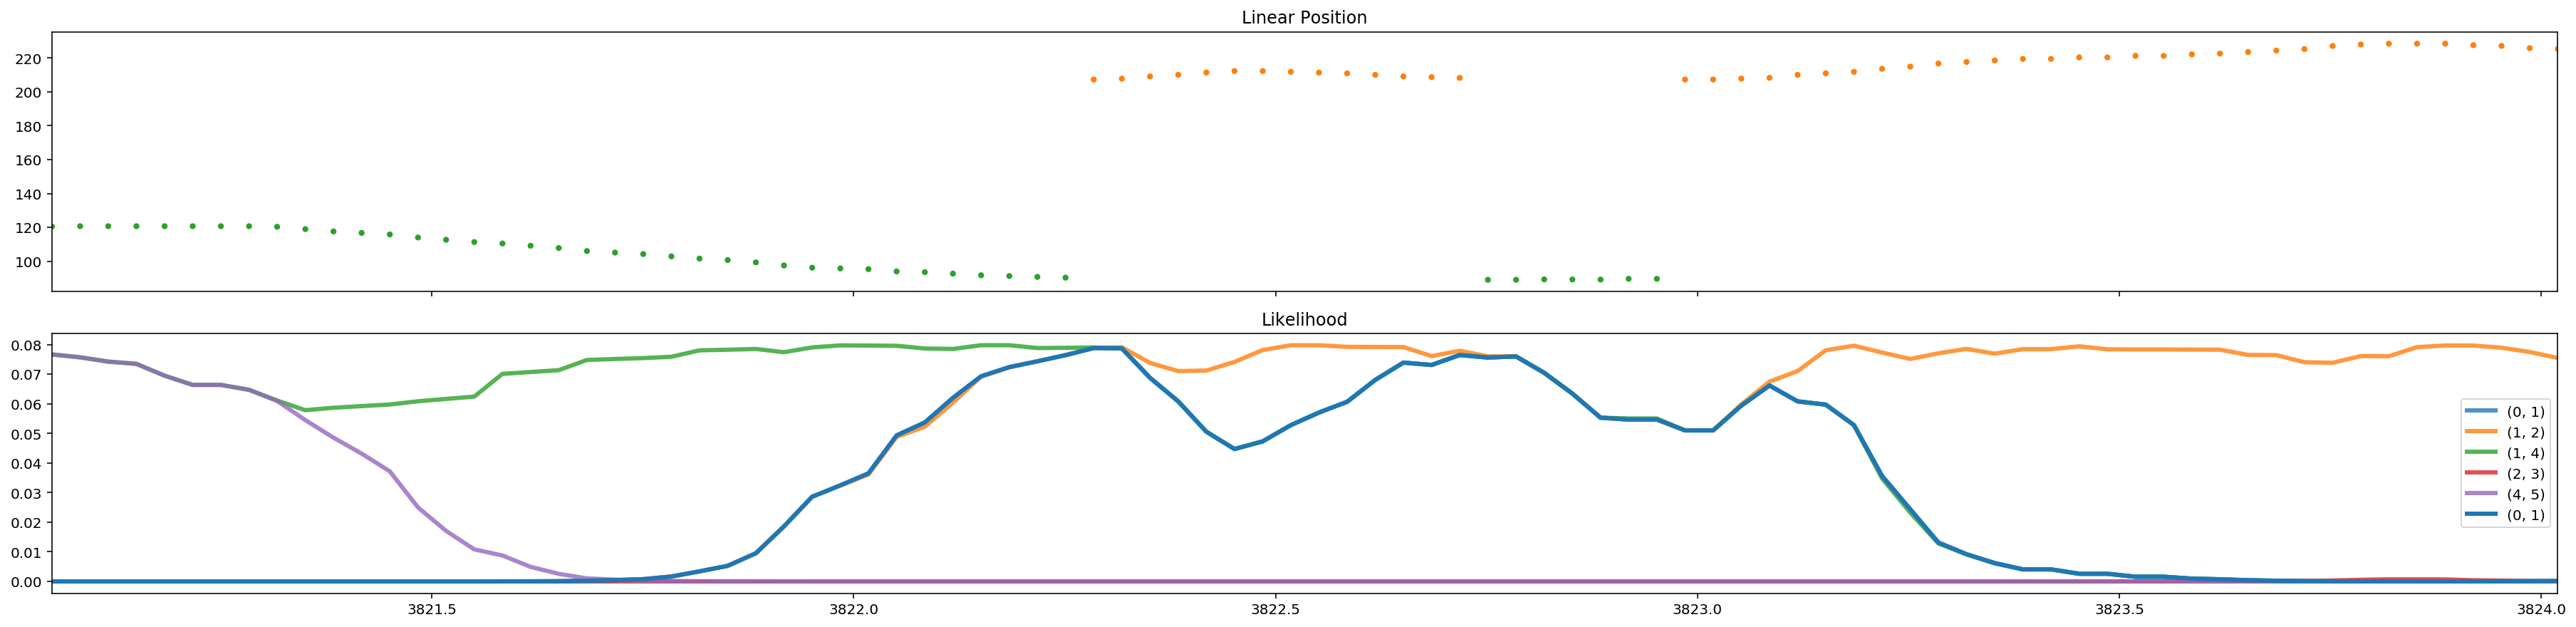

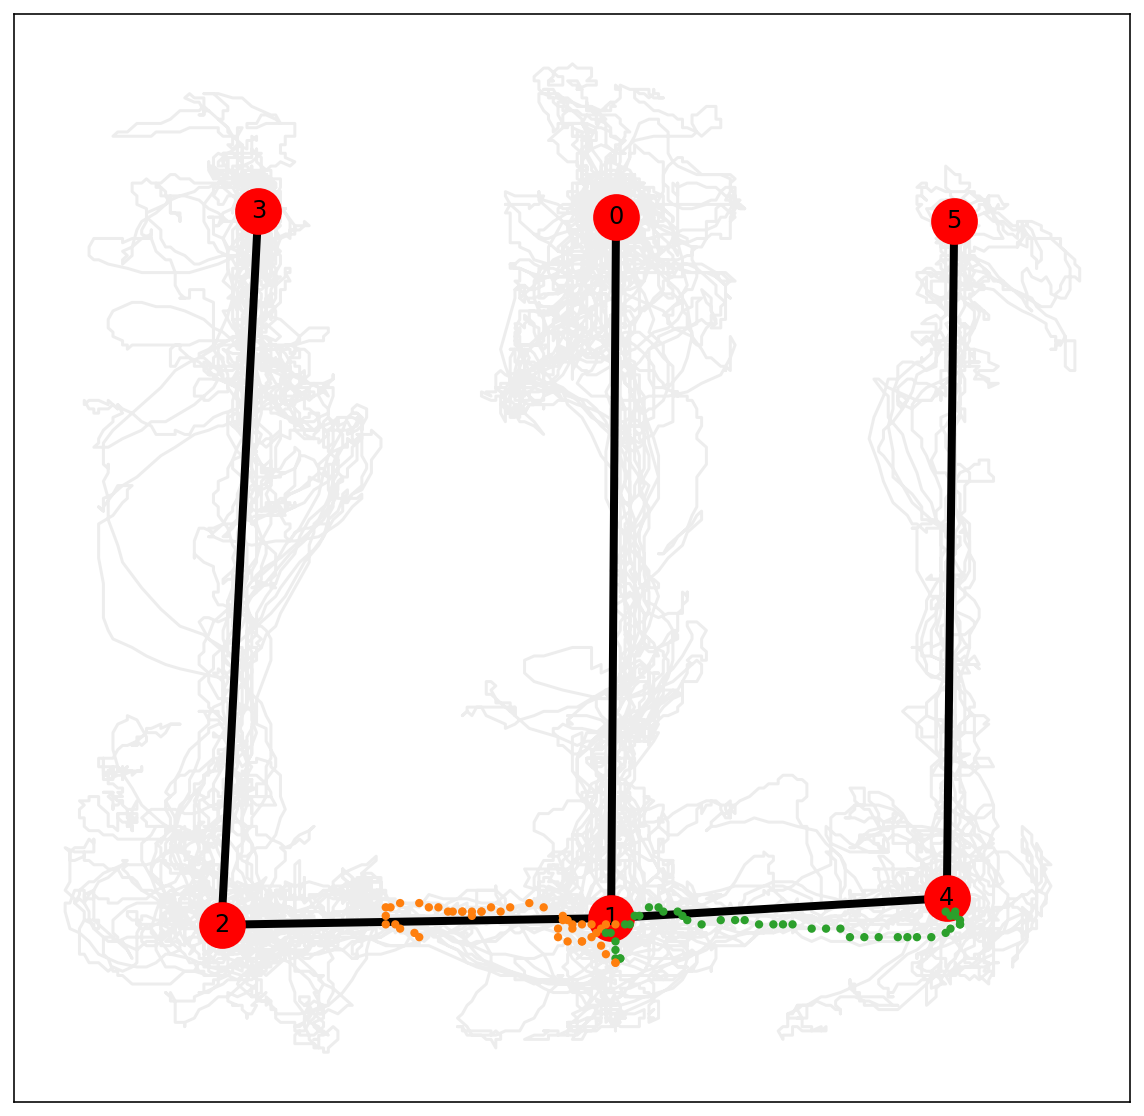

In [486]:
from loren_frank_data_processing.track_segment_classification import calculate_empirical_state_transition, calculate_position_likelihood

time_ind = np.nonzero((time >= time.min() + 92) & (time <= time.min() + 95))[0]
n_segments = len(track_graph.edges)
initial_conditions = np.ones((n_segments,))

likelihood = calculate_position_likelihood(
    position, track_graph, sigma=sensor_std_dev)

time = position_df.index / np.timedelta64(1, 's')
linear_position = position_df.linear_position.values
track_segment_id = position_df.track_segment_id.values

colors = np.array(plt.cm.tab10.colors)

fig, axes = plt.subplots(2, 1, figsize=(25, 6), sharex=True, constrained_layout=True)
axes[0].scatter(time[time_ind], linear_position[time_ind], s=10, c=colors[track_segment_id[time_ind].astype(int)])
axes[0].set_title('Linear Position')

for i, like in enumerate(likelihood.T):
    axes[1].plot(time[time_ind], like[time_ind], color=colors[i], linewidth=3, alpha=0.8, label=list(track_graph.edges)[i])
axes[1].plot(time[time_ind], likelihood.T[0][time_ind], color=colors[0], linewidth=3, alpha=1, label=list(track_graph.edges)[0])

axes[1].set_title('Likelihood')
plt.xlim((time[time_ind].min(), time[time_ind].max()))
plt.legend()

fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(position[:, 0], position[:, 1], zorder=-1, color='lightgrey', alpha=0.4)
ax.scatter(position[time_ind, 0], position[time_ind, 1], zorder=10, c=colors[track_segment_id[time_ind].astype(int)], s=10)
nx.draw_networkx(
    track_graph,
    node_position,
    ax=ax,
    width=4,
    alpha=1,
    edge_cmap=plt.get_cmap("tab10"),
    with_labels=True,
    node_size=500,
    node_color='red',
)

In [487]:
state_transition = calculate_empirical_state_transition(
    position, track_graph, scaling=route_euclidean_distance_scaling)

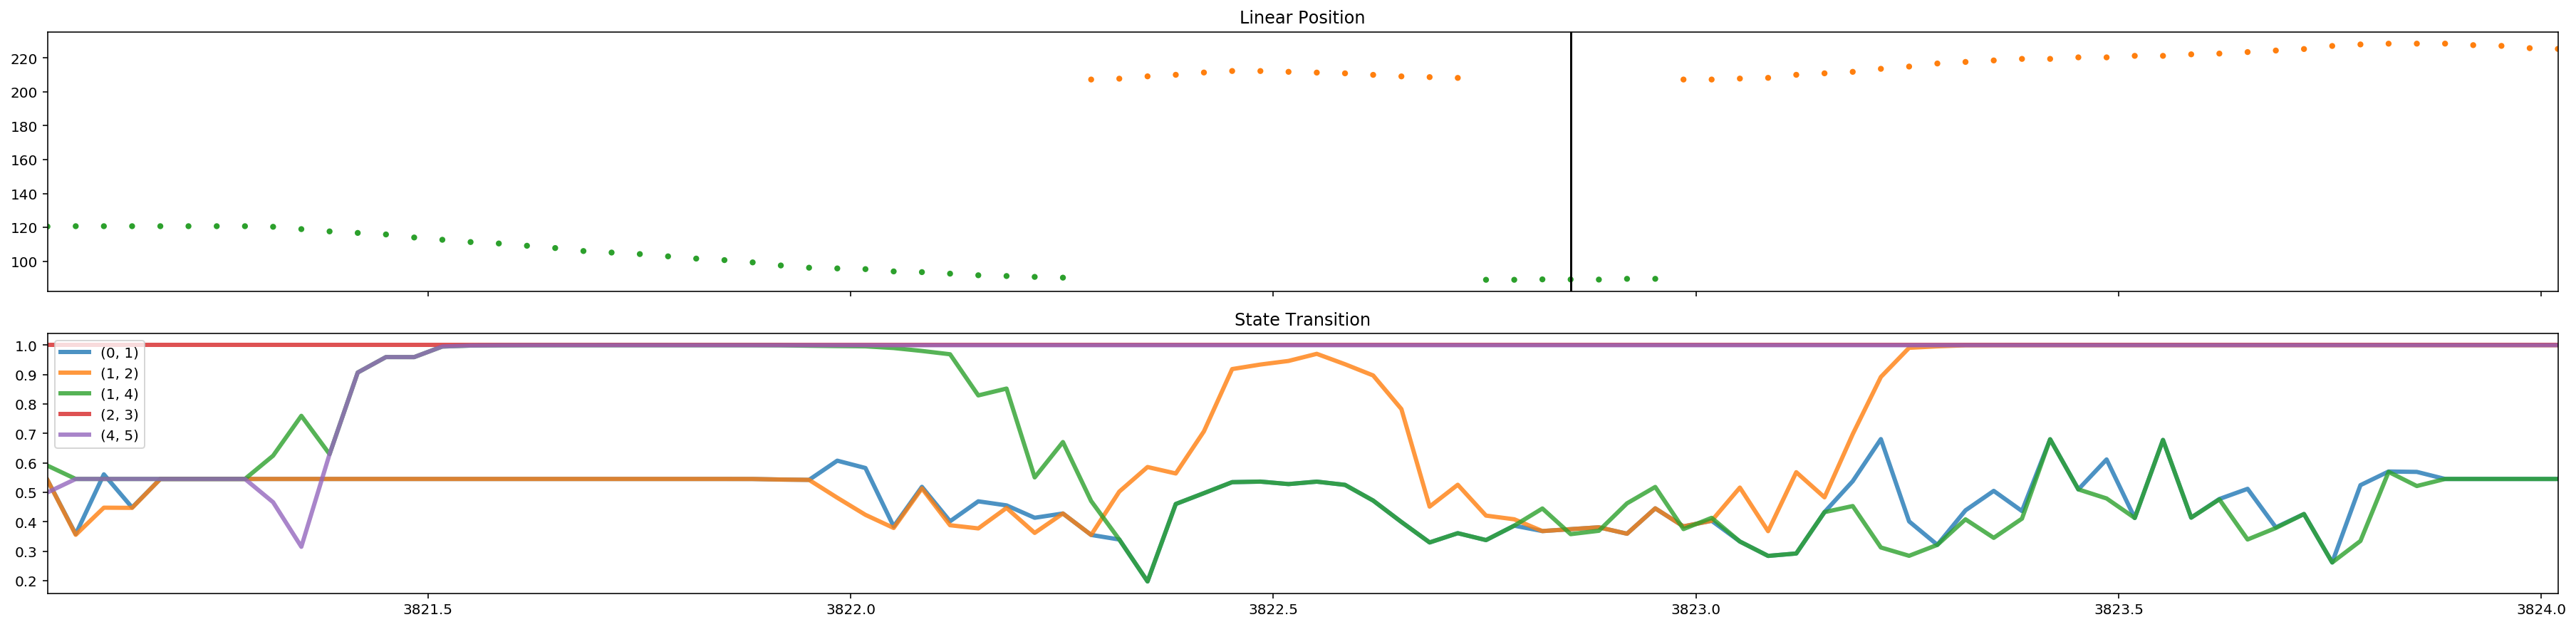

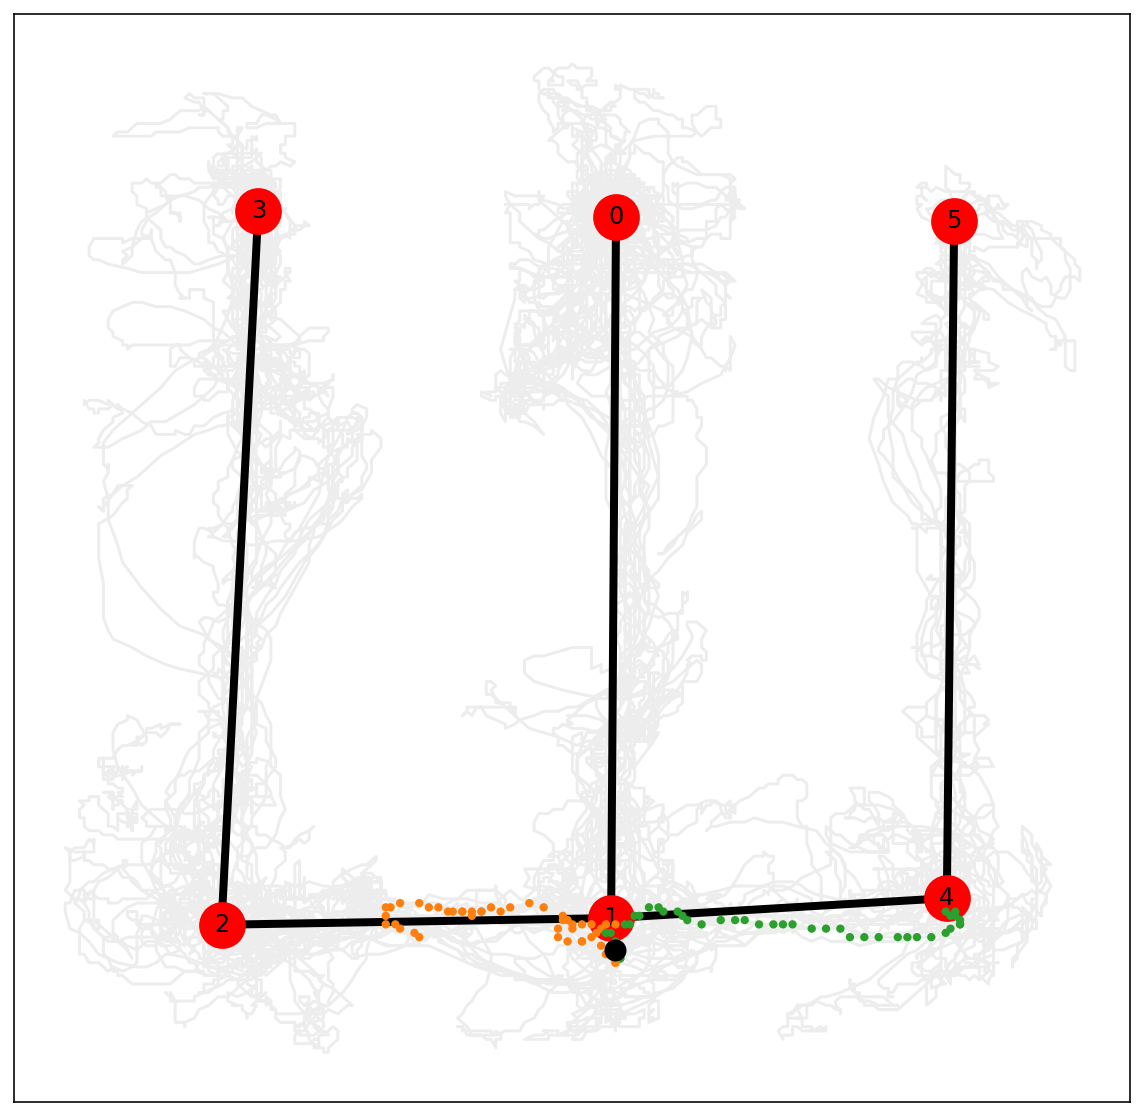

In [488]:
fig, axes = plt.subplots(2, 1, figsize=(25, 6), sharex=True, constrained_layout=True)
axes[0].scatter(time[time_ind], linear_position[time_ind], s=10, c=colors[track_segment_id[time_ind].astype(int)])
axes[0].set_title('Linear Position')

a, b = np.diag_indices(5)

for i, st in enumerate(state_transition[:, a, b].T):
    axes[1].plot(time[time_ind], st[time_ind], color=colors[i], linewidth=3, alpha=0.8, label=list(track_graph.edges)[i])

axes[1].set_title('State Transition')
plt.xlim((time[time_ind].min(), time[time_ind].max()))
plt.legend()

axes[0].axvline(time[time_ind[54]], color='black')

fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(position[:, 0], position[:, 1], zorder=-1, color='lightgrey', alpha=0.4)
ax.scatter(position[time_ind, 0], position[time_ind, 1], zorder=10, c=colors[track_segment_id[time_ind].astype(int)], s=10)
nx.draw_networkx(
    track_graph,
    node_position,
    ax=ax,
    width=4,
    alpha=1,
    edge_cmap=plt.get_cmap("tab10"),
    with_labels=True,
    node_size=500,
    node_color='red',
)

ax.scatter(position[time_ind[54], 0], position[time_ind[54], 1], color='black', s=100, zorder=200)

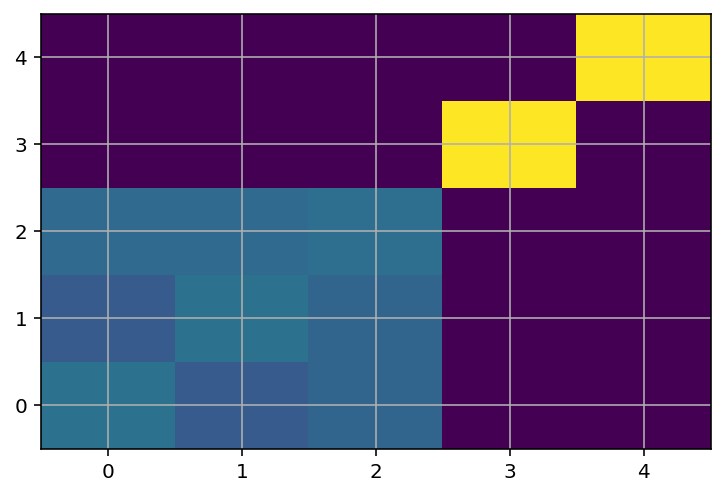

In [489]:
plt.pcolormesh(state_transition[time_ind[54]].T)
plt.xticks(np.arange(5) + 0.5, np.arange(5))
plt.yticks(np.arange(5) + 0.5, np.arange(5));
plt.grid('on')

In [471]:
import pandas as pd
pd.options.display.float_format = '{:,.3f}'.format
pd.DataFrame(state_transition[time_ind[54]])

0     1     2     3     4
0 0.312 0.312 0.375 0.000 0.000
1 0.312 0.312 0.375 0.000 0.000
2 0.353 0.353 0.294 0.000 0.000
3 0.000 0.000 0.000 1.000 0.000
4 0.000 0.000 0.000 0.000 1.000

In [478]:
exponential_pdf

array([1.00000000e+00, 8.15395806e-01, 6.64870320e-01, 5.42132470e-01,
       4.42052542e-01, 3.60447789e-01, 2.93907615e-01, 2.39651036e-01,
       1.95410450e-01, 1.59336861e-01, 1.29922608e-01, 1.05938350e-01,
       8.63816861e-02, 7.04352645e-02, 5.74326193e-02, 4.68303169e-02,
       3.81852439e-02, 3.11360877e-02, 2.53882353e-02, 2.07014606e-02,
       1.68798841e-02, 1.37637867e-02, 1.12229340e-02, 9.15113329e-03,
       7.46179570e-03, 6.08431691e-03, 4.96112649e-03, 4.04528173e-03,
       3.29850576e-03, 2.68958776e-03, 2.19307858e-03, 1.78822707e-03,
       1.45811285e-03, 1.18893911e-03, 9.69455960e-04, 7.90490323e-04,
       6.44562494e-04, 5.25573554e-04, 4.28550471e-04, 3.49438257e-04,
       2.84930489e-04, 2.32331126e-04, 1.89441825e-04, 1.54470070e-04,
       1.25954247e-04, 1.02702565e-04, 8.37432404e-05, 6.82838870e-05,
       5.56783950e-05, 4.53999298e-05])

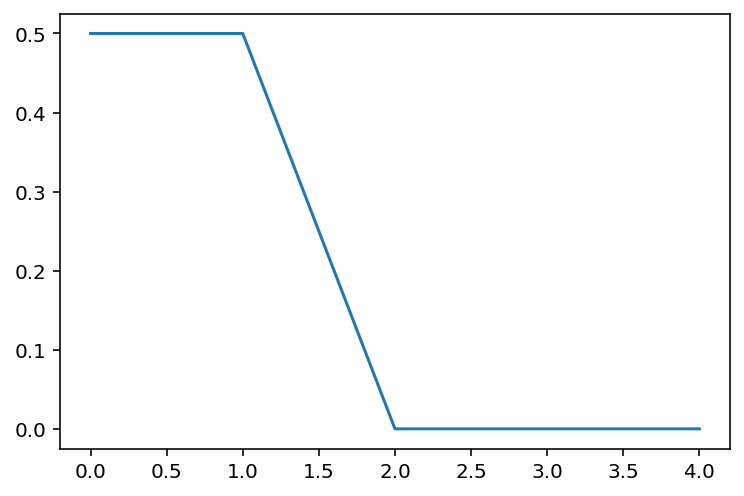

In [369]:
plt.plot(state_transition[time_ind[54]][2])

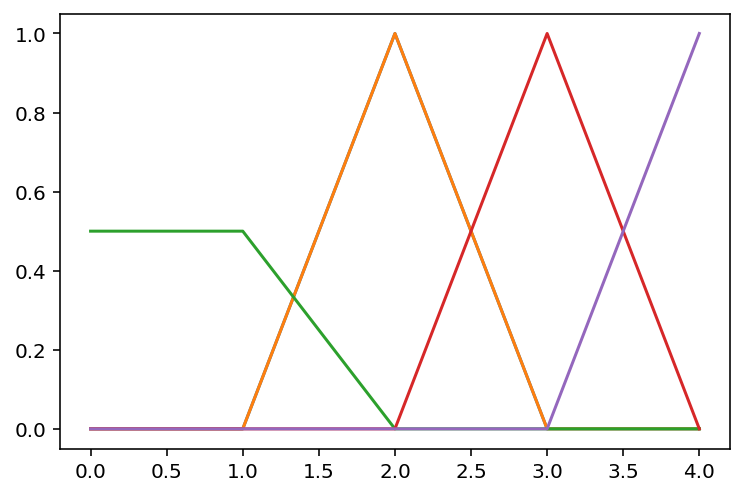

In [370]:
plt.plot(state_transition[time_ind[54]].T);

In [394]:
from loren_frank_data_processing.track_segment_classification import route_distance_change, euclidean_distance_change, normalize_to_probability

rd = route_distance_change(position, track_graph)
ed = euclidean_distance_change(position)[:, np.newaxis, np.newaxis]

In [395]:
route_and_euclidean_distance_similarity = np.abs(
    rd -
    ed)

In [396]:
pd.DataFrame(rd[time_ind[54]])

0      1      2      3      4
0  0.000  0.000  0.184 36.643 31.637
1  0.000  0.000  0.184 36.643 31.637
2  0.244  0.244  0.060 36.887 31.393
3 36.643 36.643 36.827  0.000 68.280
4 31.637 31.637 31.453 68.280  0.000

In [393]:
ed[time_ind[54]]

array([[0.9]])

In [382]:
np.abs(rd[time_ind[54]] - ed[time_ind[54]])

array([[ 0.9       ,  0.9       ,  0.71566149, 35.74266507, 30.73694479],
       [ 0.9       ,  0.9       ,  0.71566149, 35.74266507, 30.73694479],
       [ 0.65577148,  0.65577148,  0.84010999, 35.98689359, 30.49271626],
       [35.74266507, 35.74266507, 35.92700358,  0.9       , 67.37960985],
       [30.73694479, 30.73694479, 30.55260627, 67.37960985,  0.9       ]])

In [401]:
pd.DataFrame(route_and_euclidean_distance_similarity[time_ind[54]])

0      1      2      3      4
0  0.900  0.900  0.716 35.743 30.737
1  0.900  0.900  0.716 35.743 30.737
2  0.656  0.656  0.840 35.987 30.493
3 35.743 35.743 35.927  0.900 67.380
4 30.737 30.737 30.553 67.380  0.900

In [402]:
scaling = route_euclidean_distance_scaling
exponential_pdf = (
    np.exp(-route_and_euclidean_distance_similarity / scaling) / scaling)

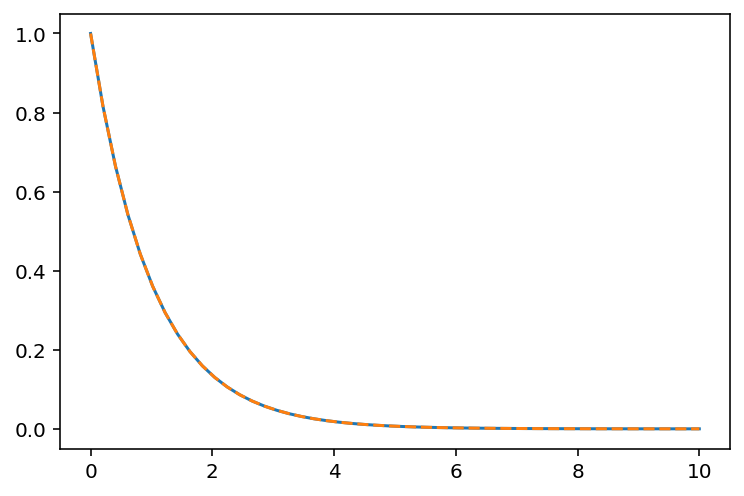

In [464]:
import scipy.stats

x = np.linspace(0, 10)
scaling = 1
exponential_pdf = (
    np.exp(-x / scaling) / scaling)

plt.plot(x, exponential_pdf)
plt.plot(x, scipy.stats.expon.pdf(x, scale=scaling), linestyle='--')

In [444]:
scipy.stats.expon.pdf(route_and_euclidean_distance_similarity, scale=scaling)[time_ind[54]]

array([[1.23409804e-003, 1.23409804e-003, 7.79689451e-003,
        5.90986993e-155, 3.24447844e-133],
       [1.23409804e-003, 1.23409804e-003, 7.79689451e-003,
        5.90986993e-155, 3.24447844e-133],
       [1.41912501e-002, 1.41912501e-002, 2.24620122e-003,
        5.13933506e-156, 3.73091954e-132],
       [5.90986993e-155, 5.90986993e-155, 9.35418441e-156,
        1.23409804e-003, 2.36631457e-292],
       [3.24447844e-133, 3.24447844e-133, 2.04982549e-132,
        2.36631457e-292, 1.23409804e-003]])

In [12]:
from loren_frank_data_processing.track_segment_classification import get_track_segments_from_graph, project_points_to_segment, route_distance


track_segments = get_track_segments_from_graph(track_graph)
projected_track_position = project_points_to_segment(
    track_segments, position)

In [ ]:
track_graph.edges

Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, using distance from well to segment trials
Failed to load file: /home/edeno/Documents/Github/loren_frank_data_processing/Raw-Data/Bond/bonDIO03.mat
No DIO file found, inferring correct inbound/outbound from task rules


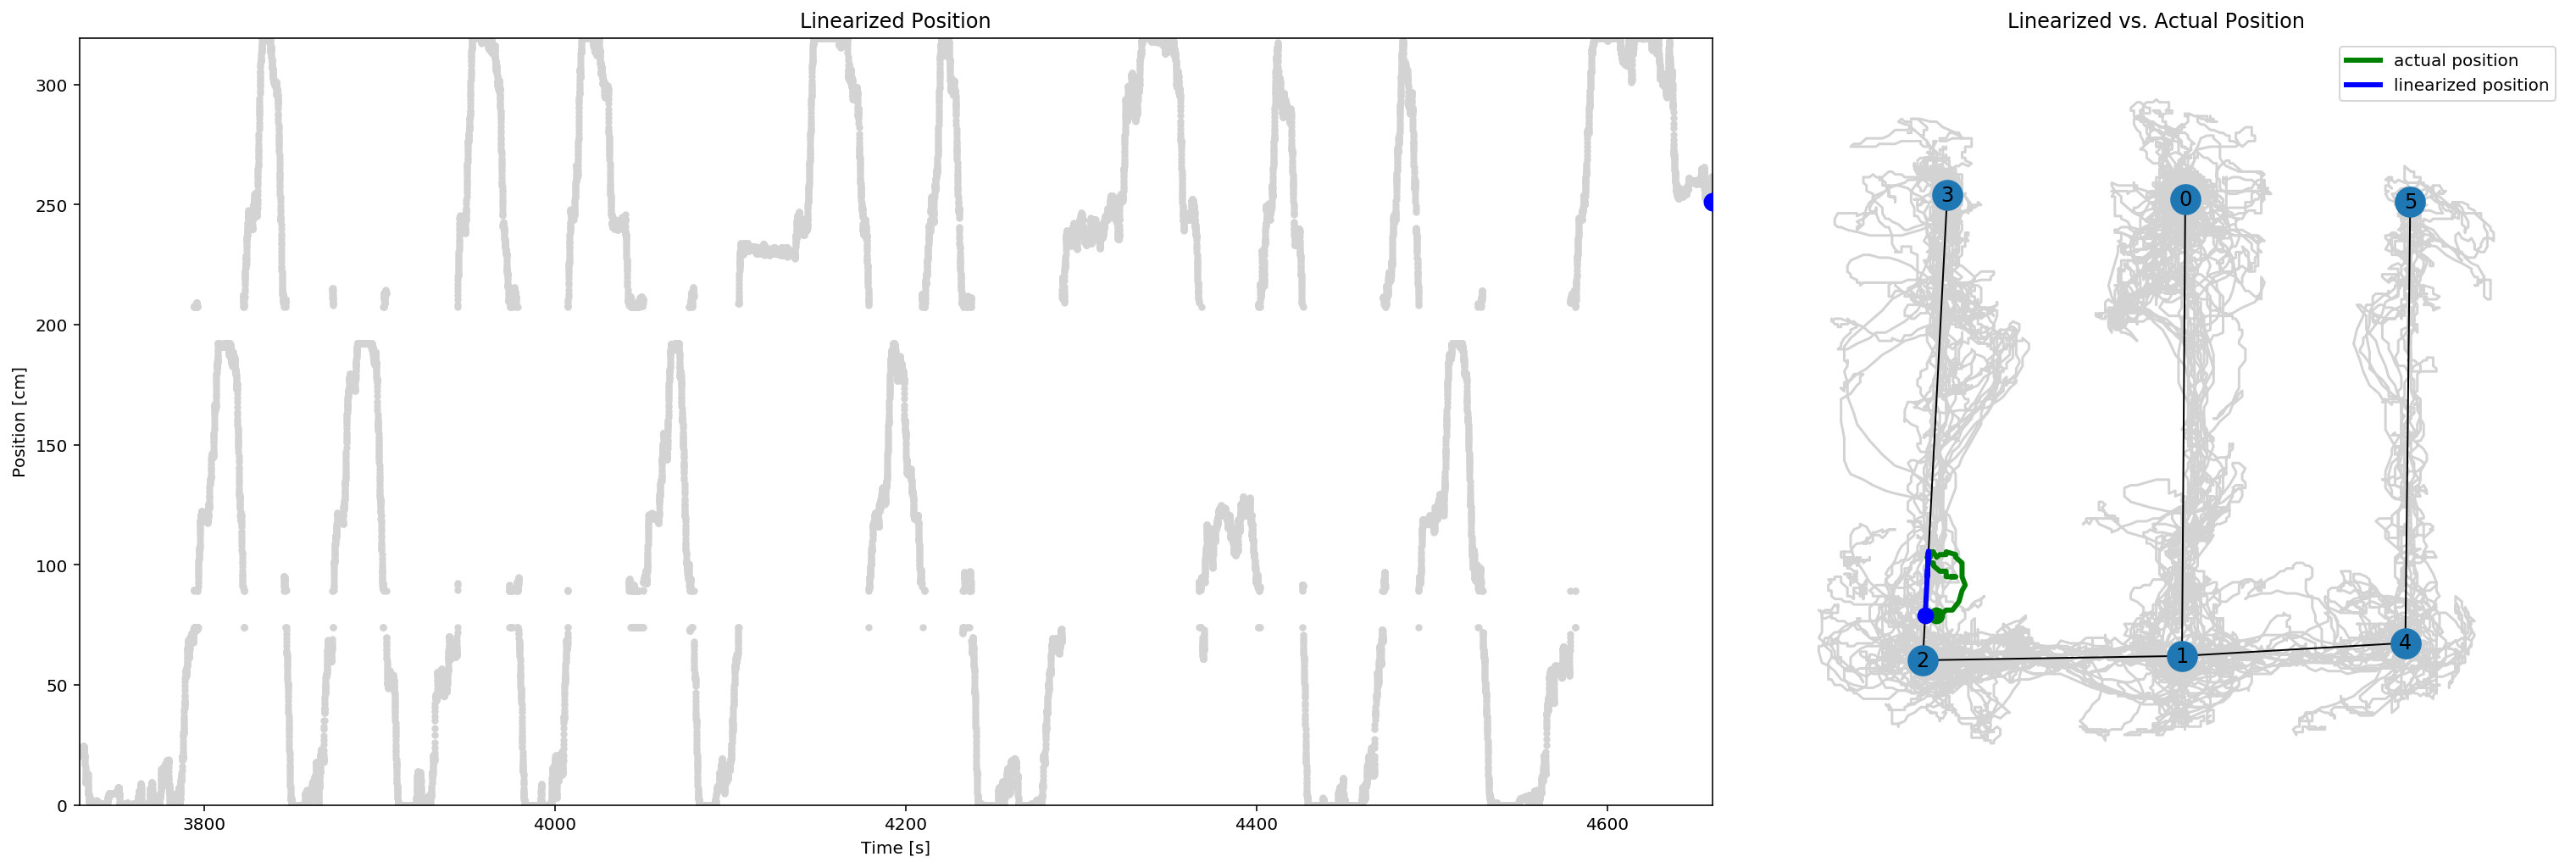

In [262]:
from loren_frank_data_processing import make_actual_vs_linearized_position_movie

position_df = get_position_dataframe(epoch_key, animals)

make_actual_vs_linearized_position_movie(
    track_graph=track_graph,
    position_df=position_df,
)